### Filters

The `filters` module defines two classes that process blocks of SNPs:
* SNPFilter applies filtering operations to the SNPs found by the "peak finder"
* NCOFilter does some "postprocessing" steps to find NCOs within blocks

When instantiating a filter object pass the constructor a dictionary with filter settings.

Both filters have an `apply` method that takes a data frame as a parameter and returns a frame after applying its filters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from xo.filters import SNPFilter, NCOFilter

In [3]:
sf = SNPFilter({})

In [4]:
sf.length_range

(0, 10000)

In [5]:
nf = NCOFilter({})

In [6]:
nf.min_z

0.9

In [7]:
df = pd.read_csv('../chr1.csv')

In [8]:
df.head()

,SNP,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background,chr_length,location,homozygosity
0,67168,BSP-OR-001,3,31010,unknown,N2,unknown,G,0,A,0,BSP-OR-001-3,0,CB4856,13819453,0.002244,NaN
1,67169,BSP-OR-001,3,31025,unknown,N2,unknown,C,0,T,0,BSP-OR-001-3,0,CB4856,13819453,0.002245,NaN
2,67170,BSP-OR-001,3,31030,N2,N2,N2,T,8,G,0,BSP-OR-001-3,0,CB4856,13819453,0.002245,1.0
3,67171,BSP-OR-001,3,31031,unknown,N2,N2,C,0,T,0,BSP-OR-001-3,0,CB4856,13819453,0.002245,NaN
4,67172,BSP-OR-001,3,31036,unknown,N2,N2,A,0,G,0,BSP-OR-001-3,0,CB4856,13819453,0.002246,NaN


In [9]:
nf.apply(df)

,SNP,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background,chr_length,location,homozygosity
46,67659,BSP-OR-001,3,68496,N2,N2,N2,A,16,C,0,BSP-OR-001-3,2,CB4856,13819453,0.004956,1.0
47,67660,BSP-OR-001,3,68500,N2,N2,N2,G,14,A,0,BSP-OR-001-3,2,CB4856,13819453,0.004957,1.0
48,67661,BSP-OR-001,3,68505,N2,N2,N2,C,16,T,0,BSP-OR-001-3,2,CB4856,13819453,0.004957,1.0
49,67662,BSP-OR-001,3,68513,N2,N2,N2,T,16,C,0,BSP-OR-001-3,2,CB4856,13819453,0.004958,1.0
50,67663,BSP-OR-001,3,68553,N2,N2,N2,T,12,A,0,BSP-OR-001-3,2,CB4856,13819453,0.004961,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,194470,BSP-OR-001,5,20615008,N2,CB4856,CB4856,C,16,T,0,BSP-OR-001-5,135,CB4856,20953657,0.983838,1.0
4542,194471,BSP-OR-001,5,20615011,N2,CB4856,CB4856,A,16,T,0,BSP-OR-001-5,135,CB4856,20953657,0.983838,1.0
4543,194472,BSP-OR-001,5,20615023,N2,CB4856,CB4856,A,16,C,0,BSP-OR-001-5,135,CB4856,20953657,0.983839,1.0
4544,194473,BSP-OR-001,5,20615025,N2,CB4856,CB4856,T,15,C,0,BSP-OR-001-5,135,CB4856,20953657,0.983839,1.0


### NCOs in the Full Data Set

In [10]:
nf = NCOFilter({})

In [11]:
blocks = pd.read_csv('../filtered.csv')

In [12]:
len(blocks)

924195

In [13]:
blocks.head()

,Unnamed: 0,SNP,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background,chr_length,location,homozygosity
0,2,67170,BSP-OR-001,3,31030,N2,N2,N2,T,8,G,0,BSP-OR-001-3,0,CB4856,13819453,0.002245,1.0
1,8,67176,BSP-OR-001,3,31065,N2,N2,N2,A,8,T,0,BSP-OR-001-3,0,CB4856,13819453,0.002248,1.0
2,9,67177,BSP-OR-001,3,31070,N2,N2,N2,C,8,T,0,BSP-OR-001-3,0,CB4856,13819453,0.002248,1.0
3,25,67512,BSP-OR-001,3,58714,N2,N2,unknown,T,9,G,0,BSP-OR-001-3,1,CB4856,13819453,0.004249,1.0
4,34,67647,BSP-OR-001,3,68256,N2,N2,N2,T,6,A,0,BSP-OR-001-3,2,CB4856,13819453,0.004939,1.0


In [14]:
coverage = blocks.ref_reads + blocks.var_reads

In [15]:
coverage.head()

0    8
1    8
2    8
3    9
4    6
dtype: int64

In [16]:
coverage.mean()

np.float64(17.899957260102035)

In [17]:
coverage.std()

np.float64(24.940459661773144)

In [18]:
coverage[coverage > 10].mean()

np.float64(27.6672550957502)

(array([5.0981e+05, 7.1200e+02, 2.4200e+02, 1.0400e+02, 4.5000e+01,
        3.4000e+01, 1.3000e+01, 4.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  220.4,  429.8,  639.2,  848.6, 1058. , 1267.4, 1476.8,
        1686.2, 1895.6, 2105. ]),
 <BarContainer object of 10 artists>)

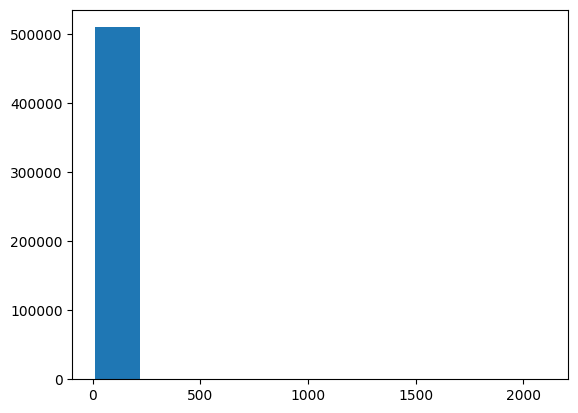

In [19]:
plt.hist(coverage[coverage > 10])

(array([43359., 48513., 52854.,     0., 50720., 50403.,     0., 46353.,
        44297., 39796.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <BarContainer object of 10 artists>)

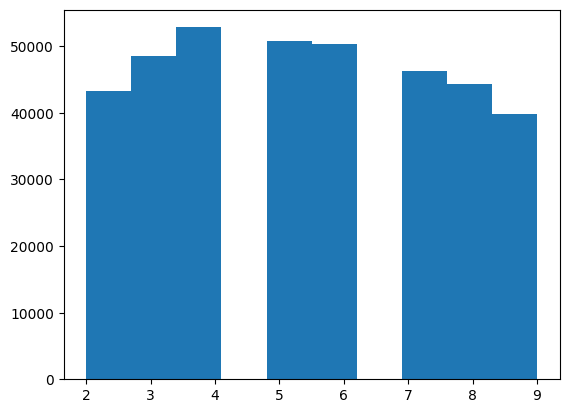

In [20]:
plt.hist(coverage[coverage < 10])

(array([ 91872., 103574.,  96756.,  44297.,  76731.,  65734.,  29564.,
         54543.,  48505.,  41542.]),
 array([ 2. ,  3.7,  5.4,  7.1,  8.8, 10.5, 12.2, 13.9, 15.6, 17.3, 19. ]),
 <BarContainer object of 10 artists>)

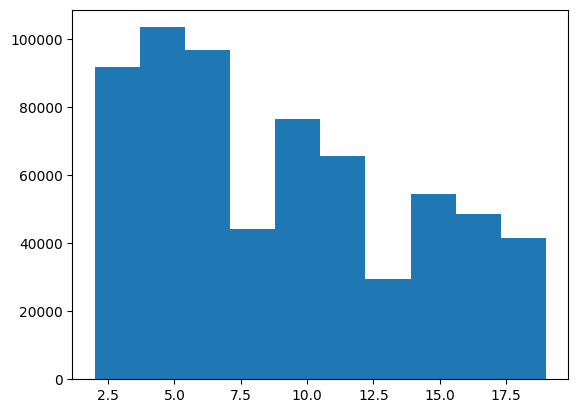

In [21]:
plt.hist(coverage[coverage < 20])

(array([144726., 147476., 121028.,  65734.,  84107.,  70113.,  38542.,
         46373.,  36631.,  28340.]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ]),
 <BarContainer object of 10 artists>)

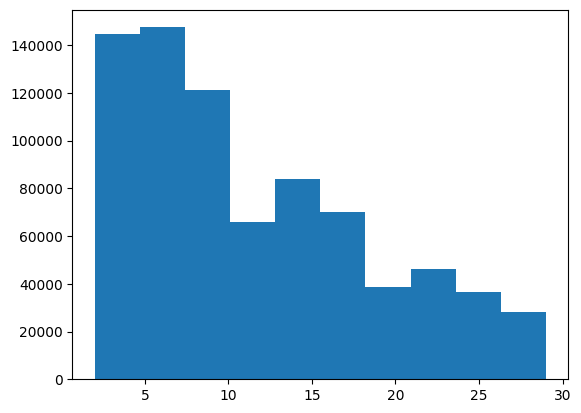

In [22]:
plt.hist(coverage[coverage < 30])

(array([43953., 26038., 17220., 13739., 11693.,  8927.,  6233.,  4214.,
         2435.,  1532.]),
 array([30. , 36.9, 43.8, 50.7, 57.6, 64.5, 71.4, 78.3, 85.2, 92.1, 99. ]),
 <BarContainer object of 10 artists>)

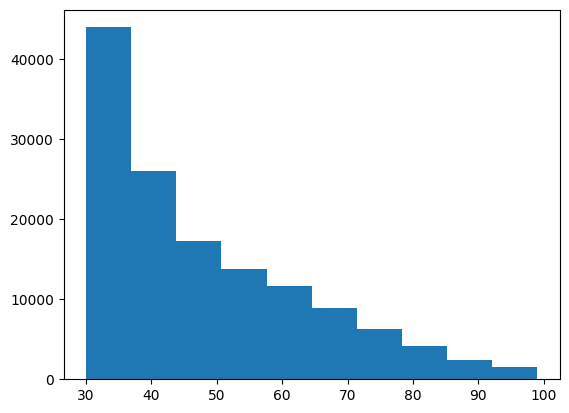

In [23]:
plt.hist(coverage[(coverage >= 30) & (coverage < 100)])

(array([447375., 241098., 109760.,  45189.,  26859.,  19132.,  12969.,
          9252.,   4988.,   2432.]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <BarContainer object of 10 artists>)

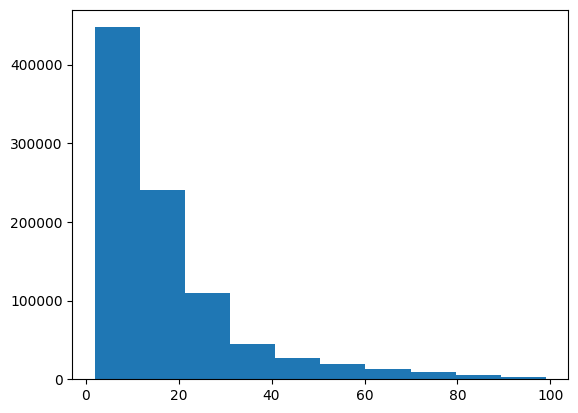

In [24]:
plt.hist(coverage[coverage < 100])

In [25]:
len(coverage[coverage >= 100])

5141

In [26]:
blocks.groupby('chromosome').max('var_reads')

,Unnamed: 0,SNP,position,ref_reads,var_reads,blk_id,chr_length,location,homozygosity
chromosome,,,,,,,,,
1,6433789,23162,14913785,331,101,35,15114068,0.986749,1.0
2,6443362,66564,15311529,625,216,132,15311845,0.999979,1.0
3,6443846,90236,13624388,392,160,51,13819453,0.985885,1.0
4,6443900,115728,17071670,1579,133,37,17493838,0.975868,1.0
5,6446438,195955,20752781,2105,222,291,20953657,0.990413,1.0
6,6426366,212560,15827557,970,115,13,17739129,0.892240,1.0


In [30]:
blocks.groupby('chrom_id').groups.keys()

dict_keys(['BSP-OR-001-3', 'BSP-OR-001-4', 'BSP-OR-001-5', 'BSP-OR-002-1', 'BSP-OR-002-2', 'BSP-OR-002-4', 'BSP-OR-002-5', 'BSP-OR-002-6', 'BSP-OR-003-2', 'BSP-OR-003-3', 'BSP-OR-003-4', 'BSP-OR-003-5', 'BSP-OR-003-6', 'BSP-OR-004-1', 'BSP-OR-004-2', 'BSP-OR-004-3', 'BSP-OR-004-5', 'BSP-OR-005-2', 'BSP-OR-005-4', 'BSP-OR-005-5', 'BSP-OR-005-6', 'BSP-OR-006-1', 'BSP-OR-006-2', 'BSP-OR-006-3', 'BSP-OR-006-5', 'BSP-OR-006-6', 'BSP-OR-007-2', 'BSP-OR-007-3', 'BSP-OR-007-4', 'BSP-OR-007-5', 'BSP-OR-008-1', 'BSP-OR-008-2', 'BSP-OR-008-3', 'BSP-OR-008-5', 'BSP-OR-009-1', 'BSP-OR-009-2', 'BSP-OR-009-3', 'BSP-OR-009-5', 'BSP-OR-009-6', 'BSP-OR-010-1', 'BSP-OR-010-3', 'BSP-OR-010-4', 'BSP-OR-010-5', 'BSP-OR-011-1', 'BSP-OR-011-2', 'BSP-OR-011-3', 'BSP-OR-011-4', 'BSP-OR-011-5', 'BSP-OR-012-2', 'BSP-OR-012-3', 'BSP-OR-012-4', 'BSP-OR-012-5', 'BSP-OR-012-6', 'BSP-OR-013-1', 'BSP-OR-013-2', 'BSP-OR-013-4', 'BSP-OR-013-5', 'BSP-OR-015-1', 'BSP-OR-015-2', 'BSP-OR-015-3', 'BSP-OR-015-4', 'BSP-OR-015-5

In [32]:
grps = blocks.groupby(['chrom_id','blk_id'])

In [39]:
chr_names = grps.count().index.levels[0]

In [40]:
'BSP-OR-001-4' in chr_names

True

In [41]:
len(chr_names)

2353